In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings("ignore")

#we will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [24]:
df = pd.read_csv("/content/DATA.csv")

In [25]:
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [26]:
df.shape

(36, 6)

In [27]:
print(df.describe())

            Volume       Weight         CO2  Unnamed: 5
count    36.000000    36.000000   36.000000         0.0
mean   1611.111111  1292.277778  102.027778         NaN
std     388.975047   242.123889    7.454571         NaN
min     900.000000   790.000000   90.000000         NaN
25%    1475.000000  1117.250000   97.750000         NaN
50%    1600.000000  1329.000000   99.000000         NaN
75%    2000.000000  1418.250000  105.000000         NaN
max    2500.000000  1746.000000  120.000000         NaN


In [28]:
X = df[['Weight','Volume']]
y = df['CO2']

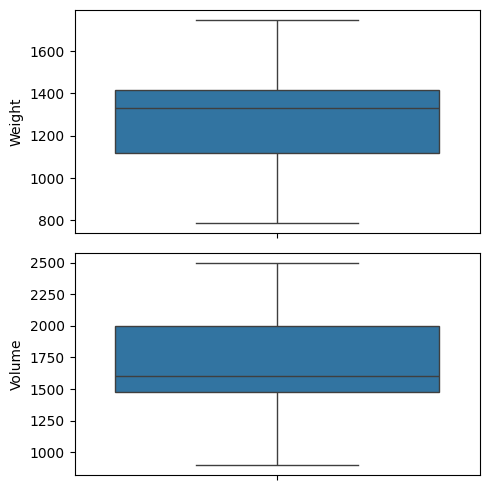

In [29]:
fig ,axs = plt.subplots(2,figsize=(5,5))
plt1 = sns.boxplot(df['Weight'],ax=axs[0])
plt2 = sns.boxplot(df['Volume'],ax = axs[1])
plt.tight_layout()

<Axes: xlabel='CO2', ylabel='Density'>

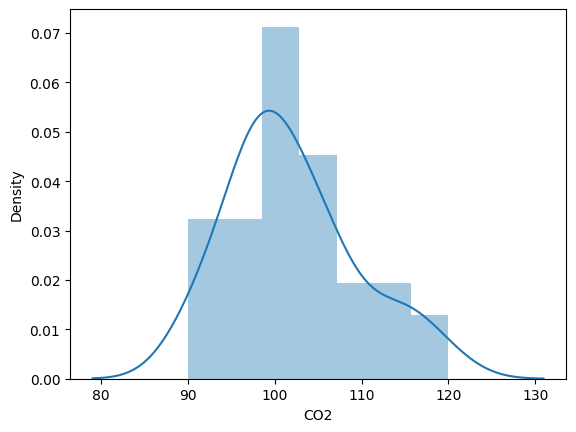

In [30]:
sns.distplot(df['CO2'])

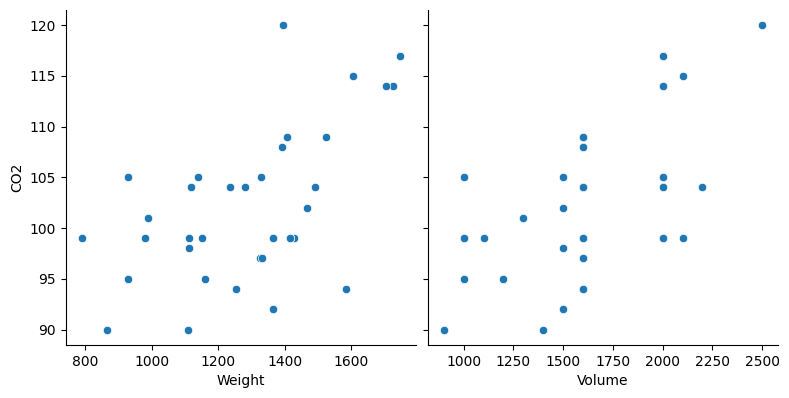

In [31]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

In [32]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [33]:
y_train.shape

(25,)

In [34]:
y_test.shape

(11,)

In [35]:
reg_model = linear_model.LinearRegression()

In [36]:
reg_model = LinearRegression().fit(X_train,y_train)

In [37]:
print('Intercept:',reg_model.intercept_)
#pair the feature names with the coefficients
list(zip(X,reg_model.coef_))

Intercept: 74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [38]:
y_pred = reg_model.predict(X_test)
x_pred = reg_model.predict(X_train)

In [39]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [41]:
#actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [42]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [43]:
print('Mean Absolute Error:' , mae)
print('Mean Sqaure Error:',mse)
print('Root Mean Sqaure Error:',r2)

Mean Absolute Error: 6.901980901636316
Mean Sqaure Error: 63.39765310998794
Root Mean Sqaure Error: 7.96226432053018
